In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, f1_score, accuracy_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from scipy.stats.stats import spearmanr, kruskal, pointbiserialr

# <font color='#FF8C00'>**ESCOLAS**</font>

In [ ]:
escolas = pd.read_csv("TS_ESCOLA.csv", encoding = "ISO-8859-1", engine='python')
escolas.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
0,2019,1,11,1100015,2,11024666,3,2,100.0,64.4,...,184.83,210.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,11,1100015,2,11024682,2,1,100.0,80.4,...,223.45,245.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,11,1100015,2,11024828,3,1,100.0,48.9,...,158.06,194.74,239.76,244.94,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,11,1100015,2,11024968,2,1,NaN,NaN,...,NaN,NaN,NaN,NaN,306.34,313.39,NaN,NaN,306.34,313.39
4,2019,1,11,1100015,2,11025077,3,1,100.0,29.5,...,173.45,180.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='#DEB887'>**VERIFICANDO A DIMENSÃO DOS DADOS**</font>

In [ ]:
escolas.shape

(70606, 137)

### <font color='#DEB887'>**VERIFICANDO A DEPENDÊNCIA ADMINISTRATIVA DAS ESCOLAS**</font>

In [ ]:
escolas["ID_DEPENDENCIA_ADM"].value_counts()

3    44231
2    25861
1      514
Name: ID_DEPENDENCIA_ADM, dtype: int64

* **<font color='#3CB371'>O dados são referentes a escolas públicas: 1 – Federal | 2 – Estadual | 3 – Municipal </font>**

### <font color='#DEB887'>**SELECIONANDO VARIÁVEIS**</font>

In [ ]:
escolas = escolas.loc[:, ["ID_ESCOLA", "PC_FORMACAO_DOCENTE_FINAL", "NIVEL_SOCIO_ECONOMICO", "MEDIA_9EF_MT", "MEDIA_9EF_LP"]]
escolas.head()

,ID_ESCOLA,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_MT,MEDIA_9EF_LP
0,11024666,64.4,Nível IV,NaN,NaN
1,11024682,80.4,Nível IV,NaN,NaN
2,11024828,48.9,Nível IV,244.94,239.76
3,11024968,NaN,Nível IV,NaN,NaN
4,11025077,29.5,Nível IV,NaN,NaN


### <font color='#DEB887'>**ELIMINANDO VALORES AUSENTES**</font>

In [ ]:
escolas[escolas.columns[escolas.isnull().any()]].isnull().sum()

PC_FORMACAO_DOCENTE_FINAL    27898
NIVEL_SOCIO_ECONOMICO         1738
MEDIA_9EF_MT                 40918
MEDIA_9EF_LP                 40918
dtype: int64

In [ ]:
escolas.dropna(axis=0, inplace=True)
escolas.drop_duplicates(keep='last', inplace=True)
escolas.shape

(29610, 5)

In [ ]:
escolas.dtypes

ID_ESCOLA                      int64
PC_FORMACAO_DOCENTE_FINAL    float64
NIVEL_SOCIO_ECONOMICO         object
MEDIA_9EF_MT                 float64
MEDIA_9EF_LP                 float64
dtype: object

# <font color='#FF8C00'>**DIRETORES**</font>

In [ ]:
diretores = pd.read_csv("TS_DIRETOR.csv")
diretores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q244,TX_RESP_Q245,TX_RESP_Q246,TX_RESP_Q247,TX_RESP_Q248,TX_RESP_Q249,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,B,B,B,B,B,A,B,B,D,D
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C


### <font color='#DEB887'>**VERIFICANDO A DIMENSÃO DOS DADOS**</font>

In [ ]:
diretores.shape

(74176, 262)

### <font color='#DEB887'>**SELECIONANDO VARIÁVEIS**</font>

In [ ]:
diretores = diretores[diretores["IN_PREENCHIMENTO_QUESTIONARIO"] == 1]

diretores = diretores.loc[:, ["ID_ESCOLA", "TX_RESP_Q002", "TX_RESP_Q004", "TX_RESP_Q006", "TX_RESP_Q009", 
                "TX_RESP_Q041", "TX_RESP_Q042", "TX_RESP_Q043", "TX_RESP_Q044", "TX_RESP_Q045", "TX_RESP_Q047",
                "TX_RESP_Q057", "TX_RESP_Q118", "TX_RESP_Q131", "TX_RESP_Q136", 
                "TX_RESP_Q146", "TX_RESP_Q225"]]

diretores.columns = ["ID_ESCOLA", "D_EXPERIENCIA_PROFESSOR_ANOS", "D_EXPERIENCIA_DIRETOR_ANOS",
                    "D_EXPERIENCIA_DIRETOR_ESCOLA", "D_HORAS_TRAB_EDUCACAO", "RECURSOS_FINANCEIROS",
                    "PROFESSORES_DISCIPLINAS", "PESSOAL_ADMINISTRATIVO", "APOIO_PEDAGOGICO",
                    "RECURSOS_PEDAGOGICOS", "PROFESSORES_ASSIDUOS", "INTERRUPCOES_CALENDARIO",
                    "CONSELHO_ESCOLAR", "CONSELHO_CLASSE", "PREPARACAO_AVALIACAO_EXTERNA",
                    "MERENDA", "PREPARACAO_AVALIACAO_LARGAESCALA"
                    ]


diretores.head()

,ID_ESCOLA,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,INTERRUPCOES_CALENDARIO,CONSELHO_ESCOLAR,CONSELHO_CLASSE,PREPARACAO_AVALIACAO_EXTERNA,MERENDA,PREPARACAO_AVALIACAO_LARGAESCALA
0,11024666,18.0,0.0,0.0,40.0,A,B,B,B,B,C,B,A,B,A,A,B
1,11024682,14.0,11.0,8.0,50.0,C,A,B,B,C,C,A,A,B,A,A,A
2,11024828,5.0,4.0,4.0,40.0,C,C,B,B,C,C,B,A,B,A,A,A
3,11024968,5.0,0.0,0.0,40.0,C,C,C,C,C,C,A,A,B,A,A,A
4,11025077,9.0,NaN,NaN,40.0,B,C,C,B,B,C,A,A,B,A,A,B


### <font color='#DEB887'>**ELIMINANDO VALORES AUSENTES**</font>

In [ ]:
diretores[diretores.columns[diretores.isnull().any()]].isnull().sum()

D_EXPERIENCIA_PROFESSOR_ANOS        2520
D_EXPERIENCIA_DIRETOR_ANOS          5828
D_EXPERIENCIA_DIRETOR_ESCOLA        8196
D_HORAS_TRAB_EDUCACAO               3977
RECURSOS_FINANCEIROS                 206
PROFESSORES_DISCIPLINAS              209
PESSOAL_ADMINISTRATIVO               222
APOIO_PEDAGOGICO                     178
RECURSOS_PEDAGOGICOS                 248
PROFESSORES_ASSIDUOS                 275
INTERRUPCOES_CALENDARIO              342
CONSELHO_ESCOLAR                     328
PREPARACAO_AVALIACAO_EXTERNA         295
MERENDA                              359
PREPARACAO_AVALIACAO_LARGAESCALA    2053
dtype: int64

In [ ]:
diretores.dropna(axis=0, inplace=True)
diretores.drop_duplicates(keep='last', inplace=True)
diretores.shape

(52622, 17)

In [ ]:
diretores.dtypes

ID_ESCOLA                             int64
D_EXPERIENCIA_PROFESSOR_ANOS        float64
D_EXPERIENCIA_DIRETOR_ANOS          float64
D_EXPERIENCIA_DIRETOR_ESCOLA        float64
D_HORAS_TRAB_EDUCACAO               float64
RECURSOS_FINANCEIROS                 object
PROFESSORES_DISCIPLINAS              object
PESSOAL_ADMINISTRATIVO               object
APOIO_PEDAGOGICO                     object
RECURSOS_PEDAGOGICOS                 object
PROFESSORES_ASSIDUOS                 object
INTERRUPCOES_CALENDARIO              object
CONSELHO_ESCOLAR                     object
CONSELHO_CLASSE                      object
PREPARACAO_AVALIACAO_EXTERNA         object
MERENDA                              object
PREPARACAO_AVALIACAO_LARGAESCALA     object
dtype: object

# <font color='#FF8C00'>**PROFESSORES**</font>

In [ ]:
professores = pd.read_csv("TS_PROFESSOR.csv")
professores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,ID_TURMA,CO_PROFESSOR,...,TX_RESP_Q119,TX_RESP_Q120,TX_RESP_Q121,TX_RESP_Q122,TX_RESP_Q123,TX_RESP_Q124,TX_RESP_Q125,TX_RESP_Q126,TX_RESP_Q127,TX_RESP_Q128
0,2019,1,11,1100015,2,11024666,3,2,1201283,2019219202,...,F,F,F,F,F,F,F,F,F,F
1,2019,1,11,1100015,2,11024682,2,1,1039462,2019159023,...,E,E,E,E,E,E,F,F,F,E
2,2019,1,11,1100015,2,11024682,2,1,1062630,2019181281,...,E,E,E,E,E,E,F,F,F,E
3,2019,1,11,1100015,2,11024682,2,1,1074339,2019217014,...,E,F,E,E,F,F,F,F,F,E
4,2019,1,11,1100015,2,11024682,2,1,1128745,2019215880,...,E,E,E,F,F,F,F,F,F,F


### <font color='#DEB887'>**VERIFICANDO A DIMENSÃO DOS DADOS**</font>

In [ ]:
professores.shape

(388119, 140)

### <font color='#DEB887'>**SELECIONANDO VARIÁVEIS**</font>

In [ ]:
professores = professores[professores["IN_PREENCHIMENTO_QUESTIONARIO"] == 1]

professores = professores.loc[:, ["ID_ESCOLA", "TX_RESP_Q002", "TX_RESP_Q110",
                                   "TX_RESP_Q112", "TX_RESP_Q116", "TX_RESP_Q123", "TX_RESP_Q125"]]

professores.columns = ["ID_ESCOLA", "P_EXPERIENCIA_PROFESSOR_ANOS", "P_DEVER_CASA", 
                       "P_ATIVIDADES_GRUPO", "P_SITUACOES_APRENDIZAGEM",
                       "P_EXERICICIOS_FIXACAO", "P_MODOS_RESOLVER_PROB"]

professores.head()

,ID_ESCOLA,P_EXPERIENCIA_PROFESSOR_ANOS,P_DEVER_CASA,P_ATIVIDADES_GRUPO,P_SITUACOES_APRENDIZAGEM,P_EXERICICIOS_FIXACAO,P_MODOS_RESOLVER_PROB
0,11024666,F,F,E,F,F,F
1,11024682,G,F,E,E,E,F
2,11024682,G,F,E,E,E,F
3,11024682,F,F,E,F,F,F
4,11024682,F,F,D,F,F,F


### <font color='#DEB887'>**ELIMINANDO VALORES AUSENTES**</font>

In [ ]:
professores[professores.columns[professores.isnull().any()]].isnull().sum()

P_EXPERIENCIA_PROFESSOR_ANOS     89705
P_DEVER_CASA                     90035
P_ATIVIDADES_GRUPO               89534
P_SITUACOES_APRENDIZAGEM         89489
P_EXERICICIOS_FIXACAO           107036
P_MODOS_RESOLVER_PROB           112095
dtype: int64

In [ ]:
professores.dropna(axis=0, inplace=True)
professores.drop_duplicates(keep='last', inplace=True)
professores.shape

(144186, 7)

In [ ]:
professores.dtypes

ID_ESCOLA                        int64
P_EXPERIENCIA_PROFESSOR_ANOS    object
P_DEVER_CASA                    object
P_ATIVIDADES_GRUPO              object
P_SITUACOES_APRENDIZAGEM        object
P_EXERICICIOS_FIXACAO           object
P_MODOS_RESOLVER_PROB           object
dtype: object

# <font color='#FF8C00'>**UNINDO AS BASES DE DADOS**</font>

In [ ]:
dataset = pd.merge(diretores, professores, how = 'inner', on = 'ID_ESCOLA')
dataset = pd.merge(dataset, escolas, how = 'inner', on = 'ID_ESCOLA')
dataset = dataset.iloc[:,:].reset_index(drop=True)
dataset.head()

,ID_ESCOLA,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,...,P_EXPERIENCIA_PROFESSOR_ANOS,P_DEVER_CASA,P_ATIVIDADES_GRUPO,P_SITUACOES_APRENDIZAGEM,P_EXERICICIOS_FIXACAO,P_MODOS_RESOLVER_PROB,PC_FORMACAO_DOCENTE_FINAL,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_MT,MEDIA_9EF_LP
0,11024828,5.0,4.0,4.0,40.0,C,C,B,B,C,...,A,E,C,F,F,F,48.9,Nível IV,244.94,239.76
1,11024828,5.0,4.0,4.0,40.0,C,C,B,B,C,...,G,E,E,E,F,F,48.9,Nível IV,244.94,239.76
2,11025280,20.0,4.0,4.0,40.0,C,B,C,C,C,...,B,E,C,F,F,F,36.5,Nível IV,241.78,240.09
3,11025280,20.0,4.0,4.0,40.0,C,B,C,C,C,...,D,F,E,F,F,F,36.5,Nível IV,241.78,240.09
4,11025310,7.0,9.0,9.0,40.0,B,C,C,C,B,...,E,F,E,F,F,F,55.6,Nível III,265.14,276.42


In [ ]:
dataset.shape

(47085, 27)

In [ ]:
catg = dataset.select_dtypes(include="object").columns.tolist()

for index in catg:
    dataset[index] = dataset[index].astype("category")

In [ ]:
dataset.describe()

,ID_ESCOLA,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,PC_FORMACAO_DOCENTE_FINAL,MEDIA_9EF_MT,MEDIA_9EF_LP
count,4.708500e+04,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000,47085.000000
mean,3.165063e+07,13.990145,6.491494,4.561092,44.014591,60.568071,257.375135,254.907442
std,9.537163e+06,7.251310,5.968968,4.817270,11.624828,22.127978,22.473688,20.352440
min,1.100026e+07,0.000000,0.000000,0.000000,0.000000,0.000000,168.060000,165.340000
25%,2.506038e+07,9.000000,2.000000,1.000000,40.000000,46.900000,242.990000,241.880000
50%,3.120311e+07,14.000000,4.000000,3.000000,40.000000,65.800000,256.960000,255.560000
75%,3.590180e+07,19.000000,9.000000,6.000000,50.000000,77.400000,271.490000,268.300000
max,5.306811e+07,35.000000,35.000000,35.000000,70.000000,100.000000,372.100000,356.010000


* **<font color='#3CB371'>Os dados não estão na mesma escala.</font>**

In [ ]:
escala = [
    (dataset["MEDIA_9EF_MT"] < 200),
    (dataset["MEDIA_9EF_MT"] >= 200) & (dataset["MEDIA_9EF_MT"] < 225),
    (dataset["MEDIA_9EF_MT"] >= 225) & (dataset["MEDIA_9EF_MT"] < 250),
    (dataset["MEDIA_9EF_MT"] >= 250) & (dataset["MEDIA_9EF_MT"] < 275),
    (dataset["MEDIA_9EF_MT"] >= 275) & (dataset["MEDIA_9EF_MT"] < 300),
    (dataset["MEDIA_9EF_MT"] >= 300) & (dataset["MEDIA_9EF_MT"] < 325),
    (dataset["MEDIA_9EF_MT"] >= 325) & (dataset["MEDIA_9EF_MT"] < 350),
    (dataset["MEDIA_9EF_MT"] >= 350) & (dataset["MEDIA_9EF_MT"] < 375),
    (dataset["MEDIA_9EF_MT"] >= 375) & (dataset["MEDIA_9EF_MT"] < 400),
    (dataset["MEDIA_9EF_MT"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8", "Nivel 9"]
dataset["ESCALA_MT"] = np.select(escala, nivel)

In [ ]:
escala = [
    (dataset["MEDIA_9EF_LP"] < 200),
    (dataset["MEDIA_9EF_LP"] >= 200) & (dataset["MEDIA_9EF_LP"] < 225),
    (dataset["MEDIA_9EF_LP"] >= 225) & (dataset["MEDIA_9EF_LP"] < 250),
    (dataset["MEDIA_9EF_LP"] >= 250) & (dataset["MEDIA_9EF_LP"] < 275),
    (dataset["MEDIA_9EF_LP"] >= 275) & (dataset["MEDIA_9EF_LP"] < 300),
    (dataset["MEDIA_9EF_LP"] >= 300) & (dataset["MEDIA_9EF_LP"] < 325),
    (dataset["MEDIA_9EF_LP"] >= 325) & (dataset["MEDIA_9EF_LP"] < 350),
    (dataset["MEDIA_9EF_LP"] >= 350) & (dataset["MEDIA_9EF_LP"] < 375),
    (dataset["MEDIA_9EF_LP"] >= 375)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8"]
dataset["ESCALA_LP"] = np.select(escala, nivel)

In [ ]:
dataset["ESCALA_MT"].value_counts()

Nivel 3    20453
Nivel 2    13976
Nivel 4     7960
Nivel 1     2923
Nivel 5     1247
Nivel 0      296
Nivel 6      178
Nivel 7       52
Name: ESCALA_MT, dtype: int64

In [ ]:
dataset["ESCALA_LP"].value_counts()

Nivel 3    21720
Nivel 2    14838
Nivel 4     6584
Nivel 1     3099
Nivel 5      510
Nivel 0      303
Nivel 6       30
Nivel 7        1
Name: ESCALA_LP, dtype: int64

### <font color='#DEB887'>**DETECTANDO OUTLIERS**</font>

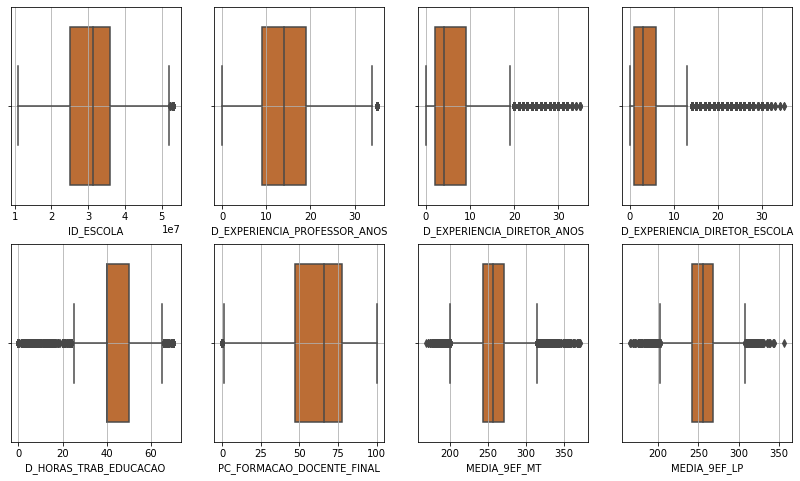

In [ ]:
variableNumerics = dataset.select_dtypes(include="number").columns.tolist()
variableNumeric = variableNumerics[1:]

plt.figure(figsize=(14,8))
for index, column in enumerate(variableNumerics):
  plt.subplot(2,4, index+1)
  sns.boxplot(x=dataset[column], color="#D2691E")
  plt.grid()
plt.show()

* **<font color='#3CB371'>Os dados contém outliers.</font>**

### <font color='#DEB887'>**TRANSFORMAÇÕES DE DADOS**</font>

In [ ]:
catNominal = ['INTERRUPCOES_CALENDARIO',
              'CONSELHO_ESCOLAR',
              'CONSELHO_CLASSE',
              'PREPARACAO_AVALIACAO_EXTERNA',
              'MERENDA',
              "PREPARACAO_AVALIACAO_LARGAESCALA"
              ]

catOrdinal = [
     'RECURSOS_FINANCEIROS', 
     'NIVEL_SOCIO_ECONOMICO',
     'PROFESSORES_DISCIPLINAS',
     'PESSOAL_ADMINISTRATIVO',
     'APOIO_PEDAGOGICO',
     'RECURSOS_PEDAGOGICOS',
     'PROFESSORES_ASSIDUOS',
     'P_EXPERIENCIA_PROFESSOR_ANOS',
     'P_DEVER_CASA',
     'P_ATIVIDADES_GRUPO',
     'P_SITUACOES_APRENDIZAGEM',
     'P_EXERICICIOS_FIXACAO',
     'P_MODOS_RESOLVER_PROB']

#'PC_FORMACAO_DOCENTE_FINAL'
#'D_EXPERIENCIA_PROFESSOR_ANOS', 
#'D_EXPERIENCIA_DIRETOR_ANOS',
#'D_EXPERIENCIA_DIRETOR_ESCOLA', 
#'D_HORAS_TRAB_EDUCACAO',

In [ ]:
label_encoder = LabelEncoder()

for index in catOrdinal:
    dataset[index] = label_encoder.fit_transform(dataset[index])


In [ ]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=int)
for index in catNominal:
    oneh = onehot_encoder.fit_transform(dataset[[index]])
    novo = pd.DataFrame(oneh, columns=[index+str(i) for i in sorted(dataset[index].unique().tolist())])    
    dataset = pd.concat([dataset, novo], axis=1)
    dataset.drop(index, axis=1, inplace=True)

#for index in catNominal:
#    novo = pd.get_dummies(mat[index])
#    novo.columns = [index+str(i) for i in sorted(novo.columns.tolist())]
#    mat = pd.concat([mat, novo], axis=1)
#    mat.drop(index, axis=1, inplace=True)


# <font color='#FF8C00'>**MATEMÁTICA**</font>

In [ ]:
mat = dataset.drop(columns=["ID_ESCOLA", "MEDIA_9EF_LP", "ESCALA_MT", "ESCALA_LP"], axis=1) 
mat.head()

,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,...,CONSELHO_ESCOLARB,CONSELHO_ESCOLARC,CONSELHO_CLASSEA,CONSELHO_CLASSEB,PREPARACAO_AVALIACAO_EXTERNAA,PREPARACAO_AVALIACAO_EXTERNAB,MERENDAA,MERENDAB,PREPARACAO_AVALIACAO_LARGAESCALAA,PREPARACAO_AVALIACAO_LARGAESCALAB
0,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
1,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
2,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
3,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
4,7.0,9.0,9.0,40.0,1,2,2,2,1,2,...,0,0,0,1,1,0,1,0,1,0


In [ ]:
mat.shape

(47085, 32)

### <font color='#DEB887'>**EXCLUINDO OUTLIERS**</font>

In [ ]:
mat = mat.loc[(mat["MEDIA_9EF_MT"] >= 200.0) & (mat["MEDIA_9EF_MT"] < 300.0)].reset_index(drop=True)
mat.head()

,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,...,CONSELHO_ESCOLARB,CONSELHO_ESCOLARC,CONSELHO_CLASSEA,CONSELHO_CLASSEB,PREPARACAO_AVALIACAO_EXTERNAA,PREPARACAO_AVALIACAO_EXTERNAB,MERENDAA,MERENDAB,PREPARACAO_AVALIACAO_LARGAESCALAA,PREPARACAO_AVALIACAO_LARGAESCALAB
0,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
1,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
2,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
3,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
4,7.0,9.0,9.0,40.0,1,2,2,2,1,2,...,0,0,0,1,1,0,1,0,1,0


In [ ]:
mat.shape

(45312, 32)

### <font color='#DEB887'>**SEPARANDO A CLASSE ALVO DAS VARIÁVEIS PREDITORAS**</font>

In [ ]:
X = mat.drop(columns=["MEDIA_9EF_MT"], axis=1).values
y = mat[["MEDIA_9EF_MT"]].values.ravel()


### <font color='#DEB887'>**DIVIDINDO EM TREINO E TESTE**</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


print(X_train.shape)
print(X_test.shape)

(31718, 31)
(13594, 31)


### <font color='#DEB887'>**NORMALIZANDO OS DADOS**</font>

In [ ]:
scaler_1 = MinMaxScaler()
scaler_2 = StandardScaler()

X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.fit_transform(X_test)

### <font color='#DEB887'>**PCA**</font>

In [ ]:
#pca = PCA(n_components=5)

#X_train = pca.fit_transform(X_train)
#X_test = pca.fit_transform(X_test)
 
#print(X_train.shape)
#print(X_test.shape)

# <font color='#FF8C00'>**CORRELAÇÕES**</font>

In [ ]:
#m = mat.drop("MEDIA_9EF_MT", axis=1)
#cat = m.columns.tolist()

catO = [
     'RECURSOS_FINANCEIROS', 
     'NIVEL_SOCIO_ECONOMICO',
     'PROFESSORES_DISCIPLINAS',
     'PESSOAL_ADMINISTRATIVO',
     'APOIO_PEDAGOGICO',
     'RECURSOS_PEDAGOGICOS',
     'PROFESSORES_ASSIDUOS',
     'P_EXPERIENCIA_PROFESSOR_ANOS',
     'P_DEVER_CASA',
     'P_ATIVIDADES_GRUPO',
     'P_SITUACOES_APRENDIZAGEM',
     'P_EXERICICIOS_FIXACAO',
     'P_MODOS_RESOLVER_PROB',
     'PC_FORMACAO_DOCENTE_FINAL',
     'D_EXPERIENCIA_PROFESSOR_ANOS',
     'D_EXPERIENCIA_DIRETOR_ANOS',
     'D_EXPERIENCIA_DIRETOR_ESCOLA', 
     'D_HORAS_TRAB_EDUCACAO']

lista_s = []
lista_p = []
for index in catO:
    s = spearmanr(mat[index], mat["MEDIA_9EF_MT"])
    lista_s.append(round(s.correlation, 2))
    lista_p.append(round(s.pvalue, 2))

novo = pd.DataFrame(list(zip(catO, lista_s, lista_p)), columns=["Feature", "Spearmanr", "P-Valor"]).sort_values(by="Spearmanr", ascending=False)
novo

,Feature,Spearmanr,P-Valor
1,NIVEL_SOCIO_ECONOMICO,0.56,0.00
13,PC_FORMACAO_DOCENTE_FINAL,0.27,0.00
5,RECURSOS_PEDAGOGICOS,0.07,0.00
0,RECURSOS_FINANCEIROS,0.06,0.00
16,D_EXPERIENCIA_DIRETOR_ESCOLA,0.06,0.00
15,D_EXPERIENCIA_DIRETOR_ANOS,0.06,0.00
14,D_EXPERIENCIA_PROFESSOR_ANOS,0.05,0.00
12,P_MODOS_RESOLVER_PROB,0.05,0.00
17,D_HORAS_TRAB_EDUCACAO,0.05,0.00
11,P_EXERICICIOS_FIXACAO,0.04,0.00


In [ ]:
catN = [
    'INTERRUPCOES_CALENDARIOA',
    'INTERRUPCOES_CALENDARIOB',
    'CONSELHO_ESCOLARA',
    'CONSELHO_ESCOLARB',
    'CONSELHO_ESCOLARC',
    'CONSELHO_CLASSEA',
    'CONSELHO_CLASSEB',
    'PREPARACAO_AVALIACAO_EXTERNAA',
    'PREPARACAO_AVALIACAO_EXTERNAB',
    'MERENDAA',
    'MERENDAB',
    'PREPARACAO_AVALIACAO_LARGAESCALAA',
    'PREPARACAO_AVALIACAO_LARGAESCALAB']


lista_s = []
lista_p = []
for index in catN:
    s = pointbiserialr(mat[index], mat["MEDIA_9EF_MT"])
    lista_s.append(round(s.correlation, 2))
    lista_p.append(round(s.pvalue, 2))

novo = pd.DataFrame(list(zip(catN, lista_s, lista_p)), columns=["Feature", "Point_Biserial", "P-Valor"]).sort_values(by="Point_Biserial", ascending=False)
novo
 

,Feature,Point_Biserial,P-Valor
6,CONSELHO_CLASSEB,0.15,0.0
2,CONSELHO_ESCOLARA,0.14,0.0
0,INTERRUPCOES_CALENDARIOA,0.08,0.0
11,PREPARACAO_AVALIACAO_LARGAESCALAA,0.06,0.0
7,PREPARACAO_AVALIACAO_EXTERNAA,0.05,0.0
9,MERENDAA,0.02,0.0
10,MERENDAB,-0.02,0.0
8,PREPARACAO_AVALIACAO_EXTERNAB,-0.05,0.0
12,PREPARACAO_AVALIACAO_LARGAESCALAB,-0.06,0.0
1,INTERRUPCOES_CALENDARIOB,-0.08,0.0


# <font color='#FF8C00'>**MODELOS**</font>

In [ ]:
models = []
models.append(("LR", LinearRegression()))
models.append(("DT", DecisionTreeRegressor(random_state=42)))
models.append(("RF", RandomForestRegressor(random_state=42)))
models.append(("GBR", GradientBoostingRegressor(random_state=42)))
models.append(("EX", ExtraTreesRegressor(random_state=42)))

for index in models:
    name = index[0]
    model = index[1]
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, error_score='raise')
    print("Name: {} => Mean R2-Score: {} Desvio R2-Score: {}".format(name, round(scores.mean(), 2), round(scores.std(),2)))

    model.fit(X_train,y_train)
    r2_train = r2_score(y_train, model.predict(X_train)).round(2)
    r2_test = r2_score(y_test, model.predict(X_test)).round(2)

    mae_train = mean_absolute_error(y_train, model.predict(X_train)).round(2)
    mae_test = mean_absolute_error(y_test, model.predict(X_test)).round(2)
    
    #model.score(X_test, y_test).round(2) retorna o coeficiente de determinação ou r2_score do teste
    
    #mse_train = mean_squared_error(y_train, model.predict(X_train)).round(2)
    #mse_test = mean_squared_error(y_test, model.predict(X_test)).round(2)

    #rmse_train = np.sqrt(mean_absolute_error(y_train, model.predict(X_train))).round(2)
    #rmse_test = np.sqrt(mean_absolute_error(y_test, model.predict(X_test))).round(2)

    print("R2-SCORE TREINO: {} \nR2-SCORE TESTE: {}".format(r2_train, r2_test))
    print("MAE TREINO: {} \nMAE TESTE: {}".format(mae_train, mae_test)) # O mais robusto para dados com outliers
    #print("MSE TREINO: {} MSE TESTE: {}".format(mse_train, mse_test))
    #print("RMSE TREINO: {} RMSE TESTE: {}".format(rmse_train, rmse_test))
    #print("\n")


Name: LR => Mean R2-Score: -12.6 Desvio R2-Score: 0.21
R2-SCORE TREINO: 0.35 
R2-SCORE TESTE: 0.35
MAE TREINO: 12.59 
MAE TESTE: 12.67
Name: DT => Mean R2-Score: -10.44 Desvio R2-Score: 0.21
R2-SCORE TREINO: 1.0 
R2-SCORE TESTE: 0.23
MAE TREINO: 0.0 
MAE TESTE: 10.4
Name: RF => Mean R2-Score: -9.1 Desvio R2-Score: 0.11
R2-SCORE TREINO: 0.95 
R2-SCORE TESTE: 0.63
MAE TREINO: 3.27 
MAE TESTE: 8.84
Name: GBR => Mean R2-Score: -12.38 Desvio R2-Score: 0.19
R2-SCORE TREINO: 0.38 
R2-SCORE TESTE: 0.37
MAE TREINO: 12.27 
MAE TESTE: 12.44
Name: EX => Mean R2-Score: -8.34 Desvio R2-Score: 0.12
R2-SCORE TREINO: 1.0 
R2-SCORE TESTE: 0.66
MAE TREINO: 0.0 
MAE TESTE: 8.05


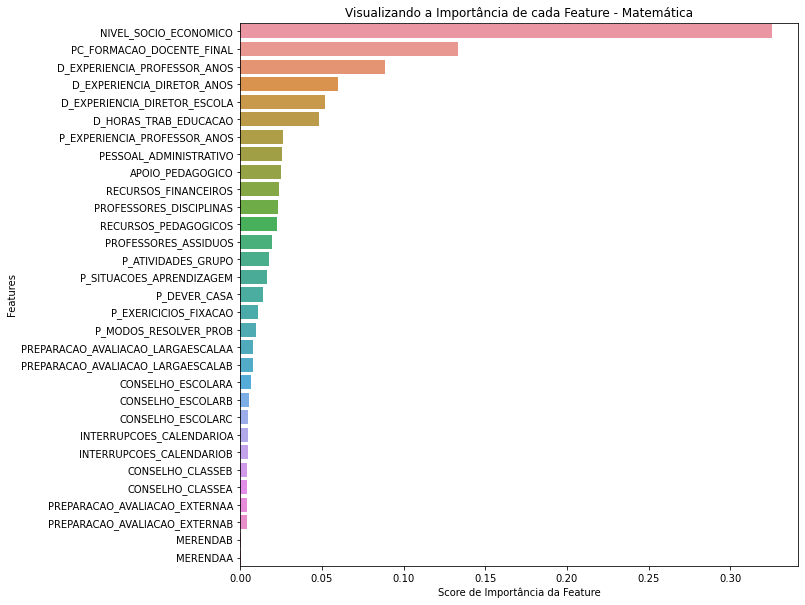

In [ ]:
features = mat.drop(["MEDIA_9EF_MT"], axis=1).columns

feature_imp = pd.Series(models[2][1].feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature - Matemática")
plt.show()

# <font color='#FF8C00'>**PORTUGUÊS**</font>

In [ ]:
port = dataset.drop(columns=["ID_ESCOLA", "MEDIA_9EF_MT", "ESCALA_MT", "ESCALA_LP"], axis=1) 
port.head()

,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,...,CONSELHO_ESCOLARB,CONSELHO_ESCOLARC,CONSELHO_CLASSEA,CONSELHO_CLASSEB,PREPARACAO_AVALIACAO_EXTERNAA,PREPARACAO_AVALIACAO_EXTERNAB,MERENDAA,MERENDAB,PREPARACAO_AVALIACAO_LARGAESCALAA,PREPARACAO_AVALIACAO_LARGAESCALAB
0,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
1,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
2,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
3,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
4,7.0,9.0,9.0,40.0,1,2,2,2,1,2,...,0,0,0,1,1,0,1,0,1,0


In [ ]:
port.shape

(47085, 32)

### <font color='#DEB887'>**EXCLUINDO OUTLIERS**</font>

In [ ]:
port = port.loc[(port["MEDIA_9EF_LP"] >= 200.0) & (port["MEDIA_9EF_LP"] < 300.0)].reset_index(drop=True)
port.head()

,D_EXPERIENCIA_PROFESSOR_ANOS,D_EXPERIENCIA_DIRETOR_ANOS,D_EXPERIENCIA_DIRETOR_ESCOLA,D_HORAS_TRAB_EDUCACAO,RECURSOS_FINANCEIROS,PROFESSORES_DISCIPLINAS,PESSOAL_ADMINISTRATIVO,APOIO_PEDAGOGICO,RECURSOS_PEDAGOGICOS,PROFESSORES_ASSIDUOS,...,CONSELHO_ESCOLARB,CONSELHO_ESCOLARC,CONSELHO_CLASSEA,CONSELHO_CLASSEB,PREPARACAO_AVALIACAO_EXTERNAA,PREPARACAO_AVALIACAO_EXTERNAB,MERENDAA,MERENDAB,PREPARACAO_AVALIACAO_LARGAESCALAA,PREPARACAO_AVALIACAO_LARGAESCALAB
0,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
1,5.0,4.0,4.0,40.0,2,2,1,1,2,2,...,0,0,0,1,1,0,1,0,1,0
2,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
3,20.0,4.0,4.0,40.0,2,1,2,2,2,2,...,0,0,0,1,1,0,1,0,0,1
4,7.0,9.0,9.0,40.0,1,2,2,2,1,2,...,0,0,0,1,1,0,1,0,1,0


In [ ]:
port.shape

(46241, 32)

### <font color='#DEB887'>**SEPARANDO A CLASSE ALVO DAS VARIÁVEIS PREDITORAS**</font>

In [ ]:
X = port.drop(columns=["MEDIA_9EF_LP"], axis=1).values
y = port[["MEDIA_9EF_LP"]].values.ravel()


### <font color='#DEB887'>**DIVIDINDO EM TREINO E TESTE**</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


print(X_train.shape)
print(X_test.shape)

(32368, 31)
(13873, 31)


### <font color='#DEB887'>**NORMALIZANDO OS DADOS**</font>

In [ ]:
scaler_1 = MinMaxScaler()
scaler_2 = StandardScaler()

X_train = scaler_1.fit_transform(X_train)
X_test = scaler_1.fit_transform(X_test)

### <font color='#DEB887'>**PCA**</font>

In [ ]:
#pca = PCA(n_components=5)

#X_train = pca.fit_transform(X_train)
#X_test = pca.fit_transform(X_test)
 
#print(X_train.shape)
#print(X_test.shape)

# <font color='#FF8C00'>**CORRELAÇÕES**</font>

In [ ]:
#m = mat.drop("MEDIA_9EF_MT", axis=1)
#cat = m.columns.tolist()

catO = [
     'RECURSOS_FINANCEIROS', 
     'NIVEL_SOCIO_ECONOMICO',
     'PROFESSORES_DISCIPLINAS',
     'PESSOAL_ADMINISTRATIVO',
     'APOIO_PEDAGOGICO',
     'RECURSOS_PEDAGOGICOS',
     'PROFESSORES_ASSIDUOS',
     'P_EXPERIENCIA_PROFESSOR_ANOS',
     'P_DEVER_CASA',
     'P_ATIVIDADES_GRUPO',
     'P_SITUACOES_APRENDIZAGEM',
     'P_EXERICICIOS_FIXACAO',
     'P_MODOS_RESOLVER_PROB',
     'PC_FORMACAO_DOCENTE_FINAL',
     'D_EXPERIENCIA_PROFESSOR_ANOS',
     'D_EXPERIENCIA_DIRETOR_ANOS',
     'D_EXPERIENCIA_DIRETOR_ESCOLA', 
     'D_HORAS_TRAB_EDUCACAO']

lista_s = []
lista_p = []
for index in catO:
    s = spearmanr(port[index], port["MEDIA_9EF_LP"])
    lista_s.append(round(s.correlation, 2))
    lista_p.append(round(s.pvalue, 2))

novo = pd.DataFrame(list(zip(catO, lista_s, lista_p)), columns=["Feature", "Spearmanr", "P-Valor"]).sort_values(by="Spearmanr", ascending=False)
novo

,Feature,Spearmanr,P-Valor
1,NIVEL_SOCIO_ECONOMICO,0.56,0.00
13,PC_FORMACAO_DOCENTE_FINAL,0.27,0.00
17,D_HORAS_TRAB_EDUCACAO,0.07,0.00
5,RECURSOS_PEDAGOGICOS,0.07,0.00
15,D_EXPERIENCIA_DIRETOR_ANOS,0.06,0.00
16,D_EXPERIENCIA_DIRETOR_ESCOLA,0.05,0.00
12,P_MODOS_RESOLVER_PROB,0.05,0.00
0,RECURSOS_FINANCEIROS,0.05,0.00
11,P_EXERICICIOS_FIXACAO,0.04,0.00
14,D_EXPERIENCIA_PROFESSOR_ANOS,0.04,0.00


In [ ]:
catN = [
    'INTERRUPCOES_CALENDARIOA',
    'INTERRUPCOES_CALENDARIOB',
    'CONSELHO_ESCOLARA',
    'CONSELHO_ESCOLARB',
    'CONSELHO_ESCOLARC',
    'CONSELHO_CLASSEA',
    'CONSELHO_CLASSEB',
    'PREPARACAO_AVALIACAO_EXTERNAA',
    'PREPARACAO_AVALIACAO_EXTERNAB',
    'MERENDAA',
    'MERENDAB',
    'PREPARACAO_AVALIACAO_LARGAESCALAA',
    'PREPARACAO_AVALIACAO_LARGAESCALAB']


lista_s = []
lista_p = []
for index in catN:
    s = pointbiserialr(port[index], port["MEDIA_9EF_LP"])
    lista_s.append(round(s.correlation, 2))
    lista_p.append(round(s.pvalue, 2))

novo = pd.DataFrame(list(zip(catN, lista_s, lista_p)), columns=["Feature", "Point_Biserial", "P-Valor"]).sort_values(by="Point_Biserial", ascending=False)
novo
 

,Feature,Point_Biserial,P-Valor
6,CONSELHO_CLASSEB,0.16,0.0
2,CONSELHO_ESCOLARA,0.15,0.0
11,PREPARACAO_AVALIACAO_LARGAESCALAA,0.08,0.0
0,INTERRUPCOES_CALENDARIOA,0.07,0.0
7,PREPARACAO_AVALIACAO_EXTERNAA,0.05,0.0
9,MERENDAA,0.02,0.0
10,MERENDAB,-0.02,0.0
8,PREPARACAO_AVALIACAO_EXTERNAB,-0.05,0.0
1,INTERRUPCOES_CALENDARIOB,-0.07,0.0
12,PREPARACAO_AVALIACAO_LARGAESCALAB,-0.08,0.0


# <font color='#FF8C00'>**MODELOS**</font>

In [ ]:
models = []
models.append(("LR", LinearRegression()))
models.append(("DT", DecisionTreeRegressor(random_state=42)))
models.append(("RF", RandomForestRegressor(random_state=42)))
models.append(("GBR", GradientBoostingRegressor(random_state=42)))
models.append(("EX", ExtraTreesRegressor(random_state=42)))

for index in models:
    name = index[0]
    model = index[1]
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, error_score='raise')
    print("Name: {} => Mean R2-Score: {} Desvio R2-Score: {}".format(name, round(scores.mean(), 2), round(scores.std(),2)))

    model.fit(X_train,y_train)
    r2_train = r2_score(y_train, model.predict(X_train)).round(2)
    r2_test = r2_score(y_test, model.predict(X_test)).round(2)

    mae_train = mean_absolute_error(y_train, model.predict(X_train)).round(2)
    mae_test = mean_absolute_error(y_test, model.predict(X_test)).round(2)
    
    #model.score(X_test, y_test).round(2) retorna o coeficiente de determinação ou r2_score do teste
    
    #mse_train = mean_squared_error(y_train, model.predict(X_train)).round(2)
    #mse_test = mean_squared_error(y_test, model.predict(X_test)).round(2)

    #rmse_train = np.sqrt(mean_absolute_error(y_train, model.predict(X_train))).round(2)
    #rmse_test = np.sqrt(mean_absolute_error(y_test, model.predict(X_test))).round(2)

    print("R2-SCORE TREINO: {} \nR2-SCORE TESTE: {}".format(r2_train, r2_test))
    print("MAE TREINO: {} \nMAE TESTE: {}".format(mae_train, mae_test)) # O mais robusto para dados com outliers
    #print("MSE TREINO: {} MSE TESTE: {}".format(mse_train, mse_test))
    #print("RMSE TREINO: {} RMSE TESTE: {}".format(rmse_train, rmse_test))
    #print("\n")


Name: LR => Mean R2-Score: -12.14 Desvio R2-Score: 0.17
R2-SCORE TREINO: 0.34 
R2-SCORE TESTE: 0.34
MAE TREINO: 12.13 
MAE TESTE: 12.16
Name: DT => Mean R2-Score: -9.73 Desvio R2-Score: 0.42
R2-SCORE TREINO: 1.0 
R2-SCORE TESTE: 0.26
MAE TREINO: 0.0 
MAE TESTE: 9.52
Name: RF => Mean R2-Score: -8.65 Desvio R2-Score: 0.14
R2-SCORE TREINO: 0.95 
R2-SCORE TESTE: 0.64
MAE TREINO: 3.09 
MAE TESTE: 8.28
Name: GBR => Mean R2-Score: -11.94 Desvio R2-Score: 0.15
R2-SCORE TREINO: 0.38 
R2-SCORE TESTE: 0.36
MAE TREINO: 11.82 
MAE TESTE: 11.95
Name: EX => Mean R2-Score: -7.95 Desvio R2-Score: 0.13
R2-SCORE TREINO: 1.0 
R2-SCORE TESTE: 0.66
MAE TREINO: 0.0 
MAE TESTE: 7.52


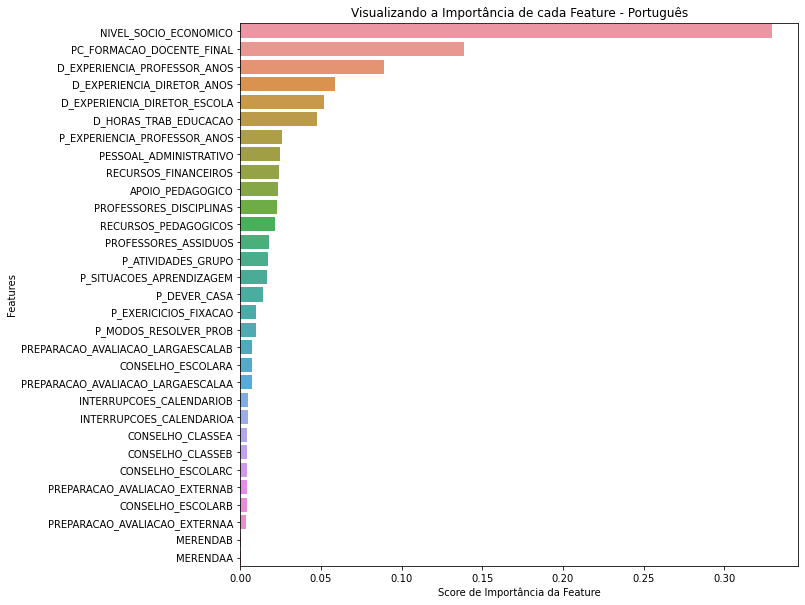

In [ ]:
features = port.drop(["MEDIA_9EF_LP"], axis=1).columns

feature_imp = pd.Series(models[2][1].feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature - Português")
plt.show()